## Import data:

In [1]:
import pickle
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval,ImageNormalize
from cliotools.bditools import make_paper_plots, make_completeness_maps

# Load information specific to this system:
sp = pickle.load(open('../system-parameters.pkl','rb'))
path = sp['paths'][0]

StarName = sp[path+'StarName']
obsdate = sp[path+'obs_date']
wavelength = 3.9
box = sp[path+'box']
ContCurveComputationDate = sp[path+'today']

filesuffix = sp[path+'filesuffix']
mass_limit_filesuffix = sp[path+'mass_limit_filesuffix']

ACube = fits.getdata('acube_box'+str(box)+'_bpf'+filesuffix+'.fits')
BCube = fits.getdata('bcube_box'+str(box)+'_bpf'+filesuffix+'.fits')

sep = sp[path+'sep']
C = sp[path+'C']

d = sp[path+'distance']

K_klipA = sp[path+'K_klipA']
K_klipB = sp[path+'K_klipB']


## The first image in the cube of cleaned images used in KLIP reduction:

<IPython.core.display.Javascript object>


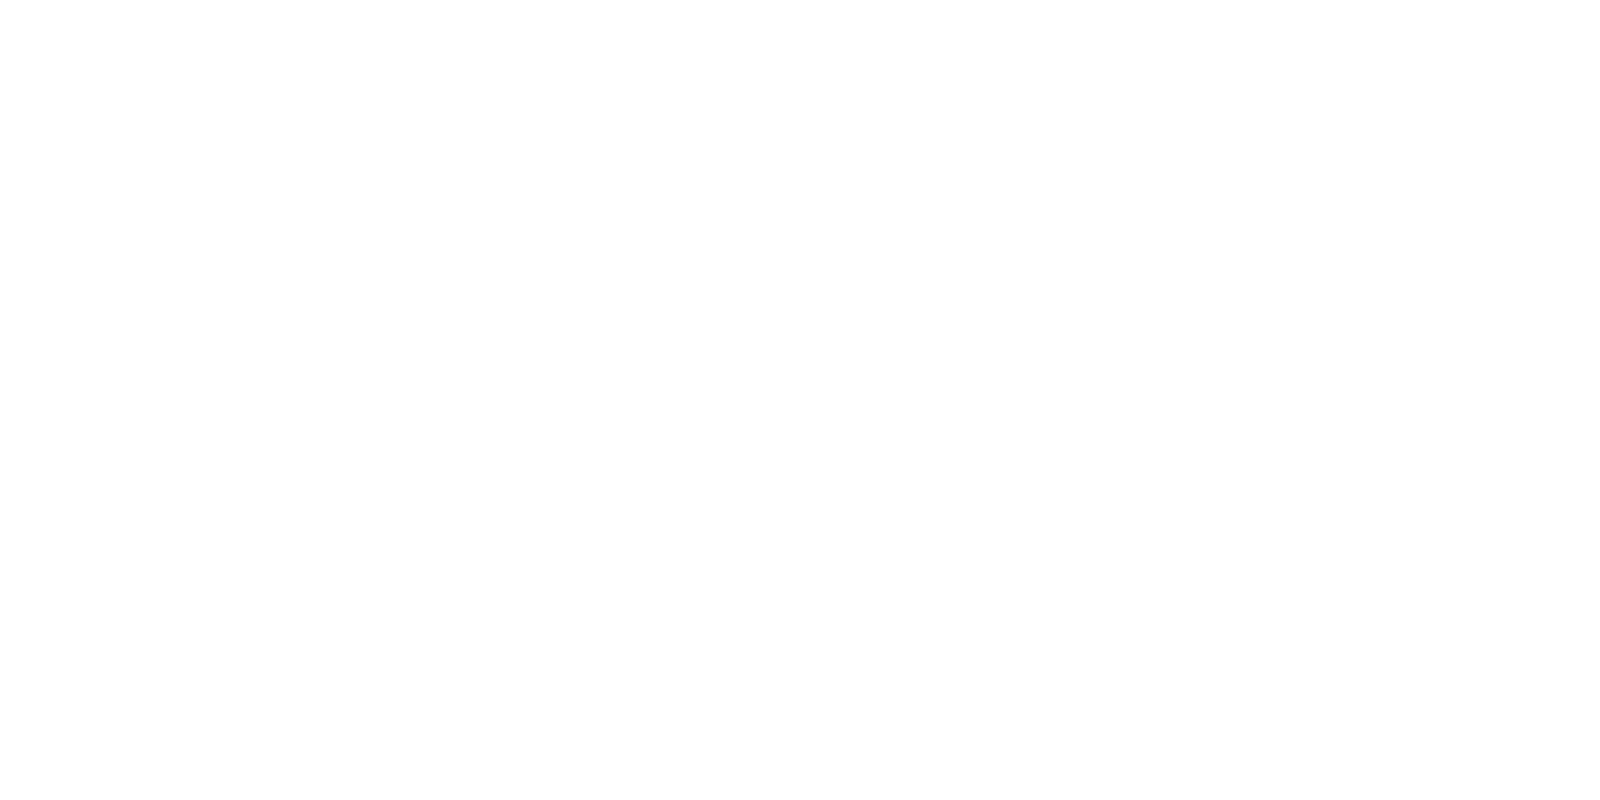

In [2]:
%matplotlib notebook
plt.figure(figsize = (8,4))
plt.subplot(121)
im = ACube[0]
plt.imshow(im, origin='lower', cmap='gray',
               norm = ImageNormalize(im, interval=ZScaleInterval(),))
plt.title('A')
plt.subplot(122)
im = BCube[0]
plt.imshow(im, origin='lower', cmap='gray',
               norm = ImageNormalize(im, interval=ZScaleInterval(),))
plt.title('B')
plt.savefig('cleaned-images.png',bbox_inches='tight', facecolor = 'white',dpi = 350)
plt.show()

## KLIP reduced image(s):

<IPython.core.display.Javascript object>


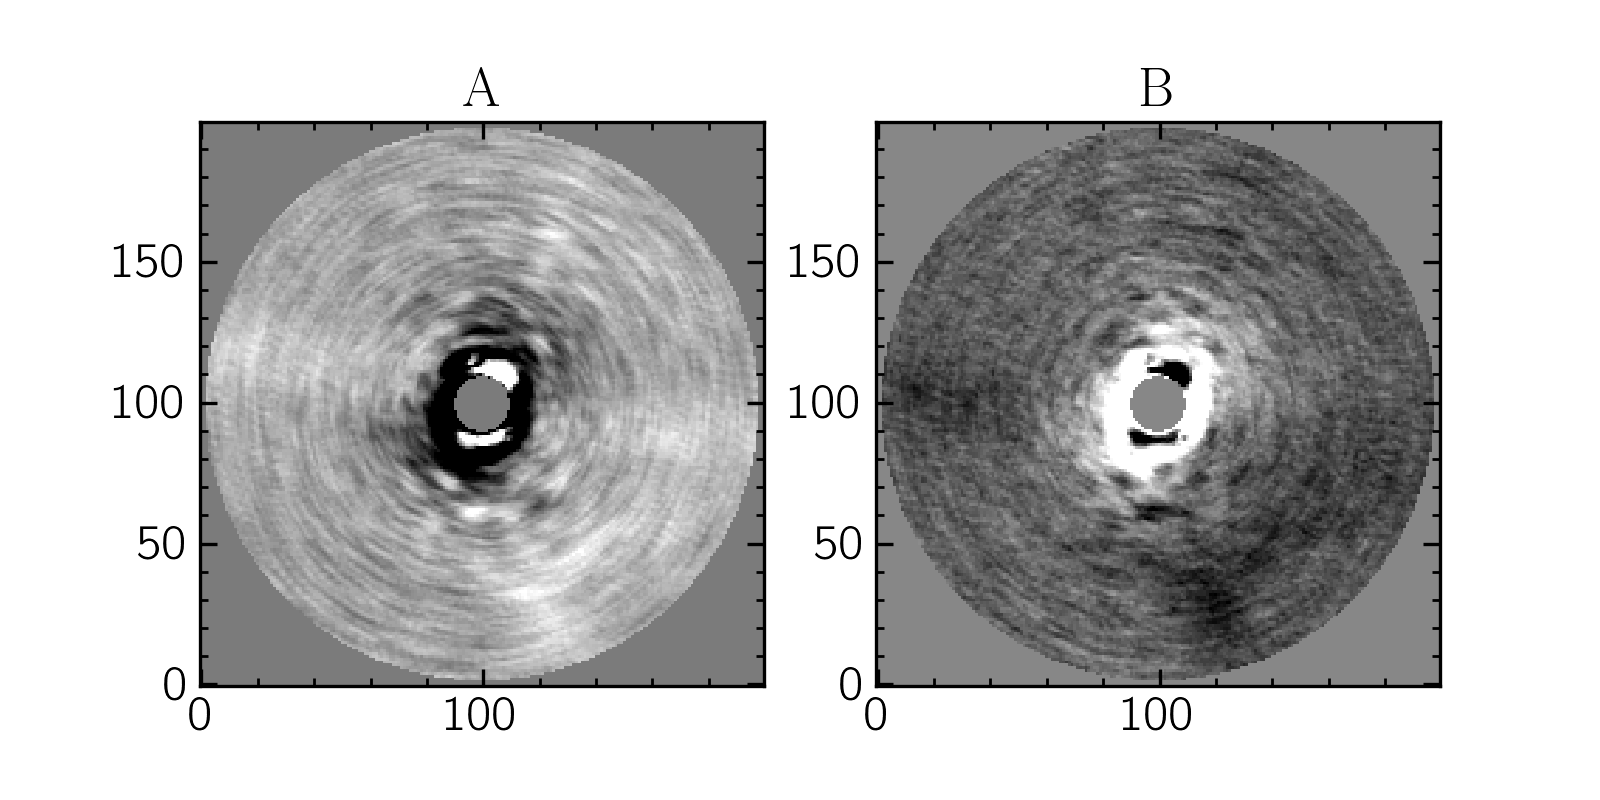

In [3]:
AReduced = fits.getdata('A_klipcube_HD36705_box100_Kklip5-10-15-20-25_im7_om100_2021-9-20.fit')
BReduced = fits.getdata('B_klipcube_HD36705_box100_Kklip5-10-15-20-25_im7_om100_2021-9-20.fit')

%matplotlib notebook
plt.style.use('magrathea')
plt.figure(figsize = (8,4))
plt.subplot(121)
im = AReduced[3]
plt.imshow(im, origin='lower', cmap='gray',
               norm = ImageNormalize(im, interval=ZScaleInterval(),))
plt.title('A')
plt.subplot(122)
im = BReduced[3]
plt.imshow(im, origin='lower', cmap='gray',
               norm = ImageNormalize(im, interval=ZScaleInterval(),))
plt.title('B')
plt.savefig('reduced-images.png',bbox_inches='tight', facecolor = 'white',dpi = 350)
plt.show()

## Contrast Curve Plots:

HD 36705
A
Location of max constrast [22.2804] AU [1.48536] arcsec
Min flux contrast -2.0580907330547507
Max mag contrast 5.145226832636877
Min planet mass 0.06781101532335934
B
Location of max constrast [22.2804] AU [1.48536] arcsec
Min flux contrast -2.6559982257073522
Max mag contrast 6.63999556426838
Min planet mass 0.014236800451195804
Min sep AU 3.15639 AU
Max sep AU 22.2804 AU


<IPython.core.display.Javascript object>


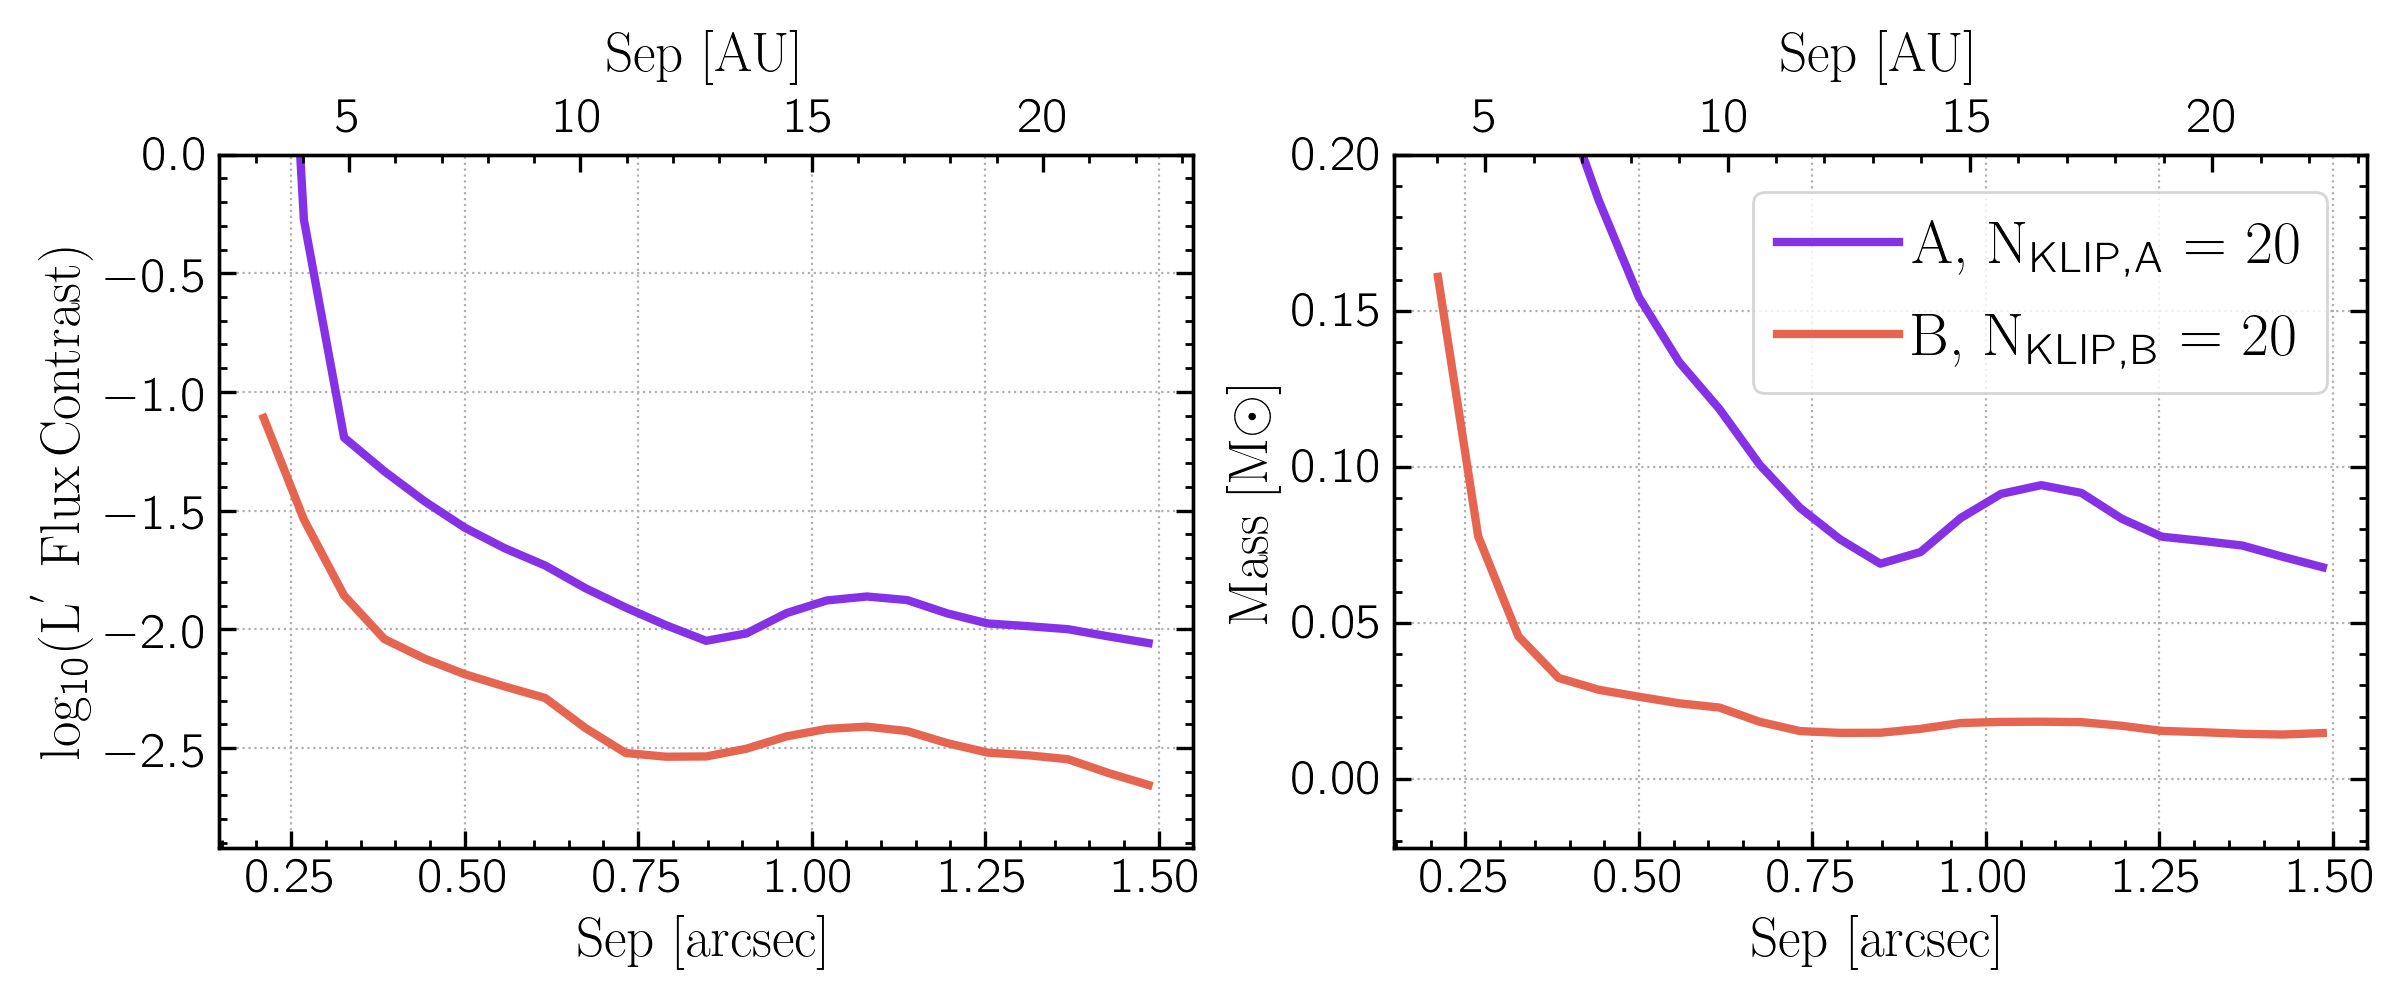

In [4]:
make_paper_plots('', box, d, sep, C, K_klipA, K_klipB, StarName, obsdate, wavelength, ContCurveComputationDate,
                     ACube, BCube,
                     filesuffix = filesuffix, mass_limit_filesuffix = mass_limit_filesuffix,
                     inner_mask = 1., cont_plot_ylim = 0., mass_plot_ylim = 0.2, savefig = True,
                     savefile = 'contrast-limits.png', figsize = (12,5)
                    )

<IPython.core.display.Javascript object>


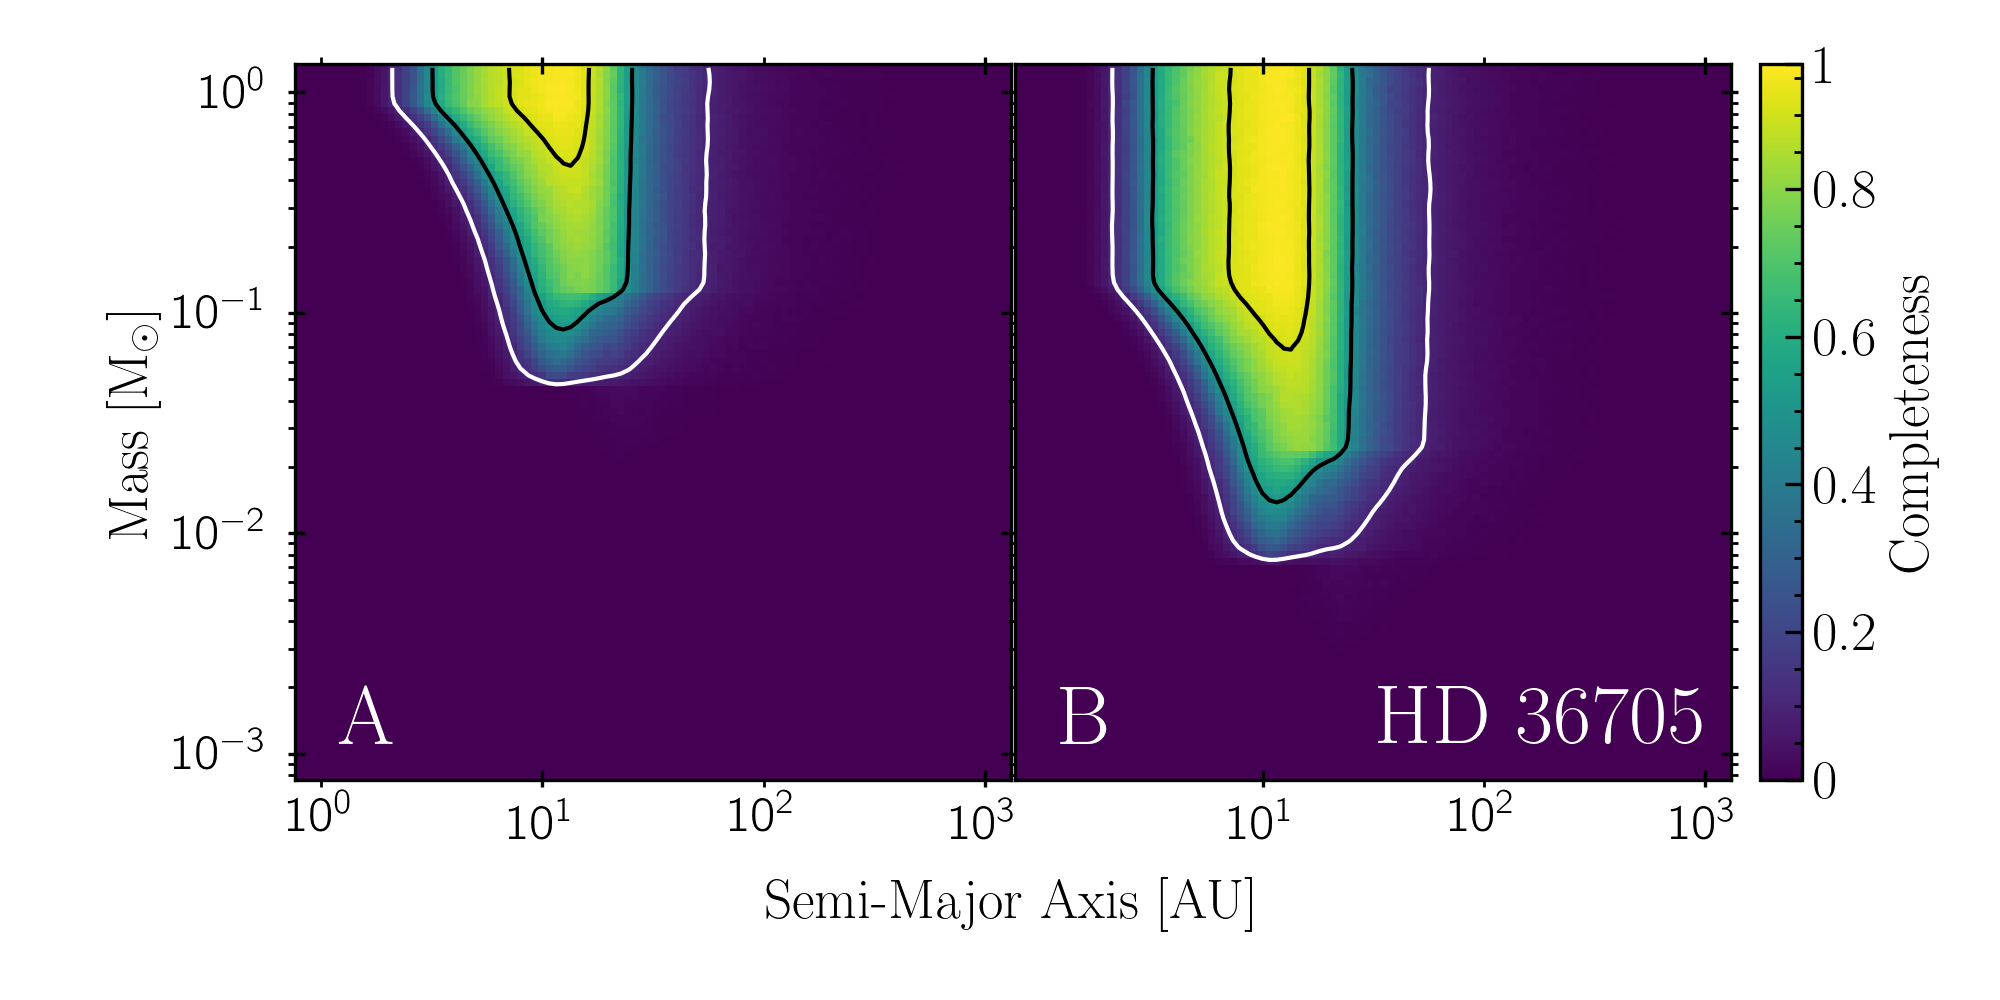

In [6]:
Stars = ['A','B']
finalMap1, sma, mass = pickle.load(open(StarName.replace(' ','')+Stars[0]+'-map.pkl', 'rb'))
finalMap2, sma, mass = pickle.load(open(StarName.replace(' ','')+Stars[1]+'-map.pkl', 'rb'))

make_completeness_maps(StarName, finalMap1, finalMap2, sma, mass,
                     Stars = ['A','B'], figsize = (10,5), 
                     savefig = True,
                     savefile = 'completeness-maps.png'
                    )